In [96]:
### Lecture et affichage du train
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
### Lecture et affichage du test
test_data = pd.read_csv('test2.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
### Afficher les détails statistique du train
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
## Afficher les données manquantes
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(12)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [6]:
### Observation :
## Embarqué n'a que 2 valeurs manquantes. 
## Cabine doit être étudiée plus en détail, car 77% d'entre elles sont manquantes.
## Age a 177 valeurs manquantes

In [7]:
### Première question qu'on s'est posé :
### Combien de personnes ont embarqué à partir de différents ports (PClass) ? 
### Existe-t-il une corrélation entre le port d'embarquement et la survie ?

In [8]:
### Pourcentage d'embarquement sur les différents ports
train_data['Embarked'].value_counts()/len(train_data)

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

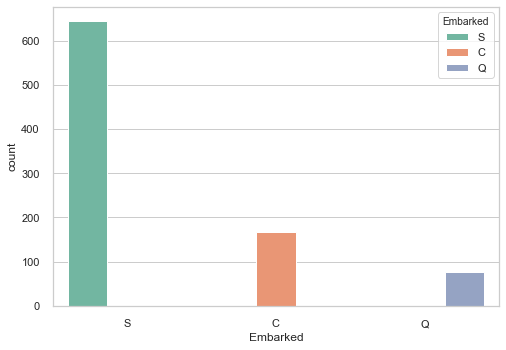

In [9]:
### Graphe d'embarquement
sns.set(style="whitegrid")
sns.countplot( x='Embarked', data=train_data, hue="Embarked", palette="Set2");

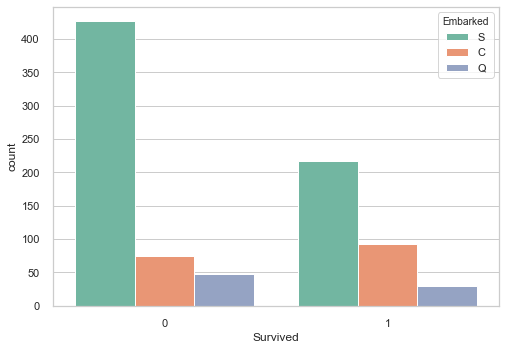

In [10]:
### Graphe survie selon le port d'embarquement 
sns.set(style="whitegrid")
sns.countplot( x='Survived', data=train_data, hue="Embarked", palette="Set2");

In [11]:
### Regroupement par moyenne et par port d'embarquement
train_data.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [12]:
### Deuxième question qu'on s'est posé :

### Le sexe a t'il une influence sur la survie du passager ?

In [13]:
### Regroupement par moyenne et par sexe
train_data.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


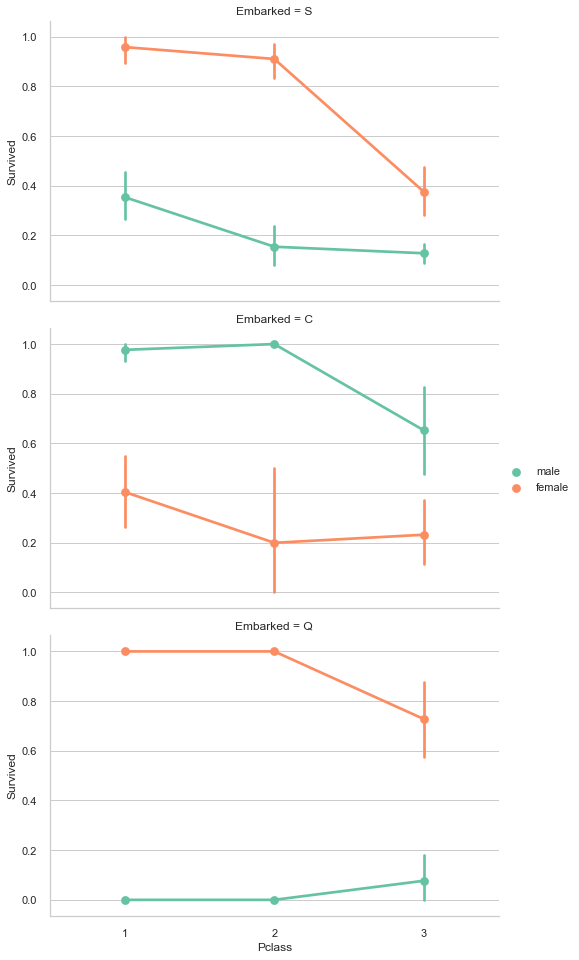

In [14]:
### Graphe survie selon le sexe et le port d'embarquement 
FacetGrid = sns.FacetGrid(train_data, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None, palette="Set2" )
FacetGrid.add_legend();

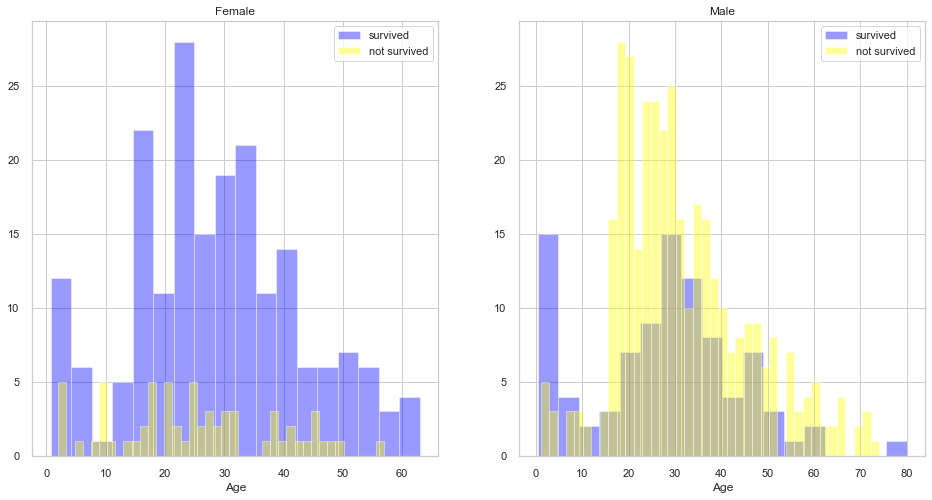

In [15]:
##### Graphe survie selon l'age et le sexe
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="blue")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="yellow")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="blue")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="yellow")
ax.legend()
_ = ax.set_title('Male');

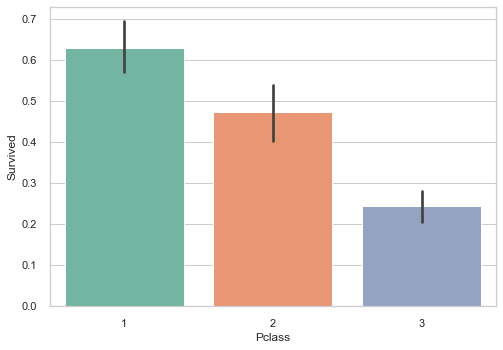

In [16]:
### Graphe survie selon la classe
sns.barplot(x='Pclass', y='Survived', data=train_data, palette="Set2");

In [17]:
### On observe que la classe a une forte influence sur la survie
### surtout si cette personne est en classe 1. Nous allons créer un autre graphique pclass ci-dessous.

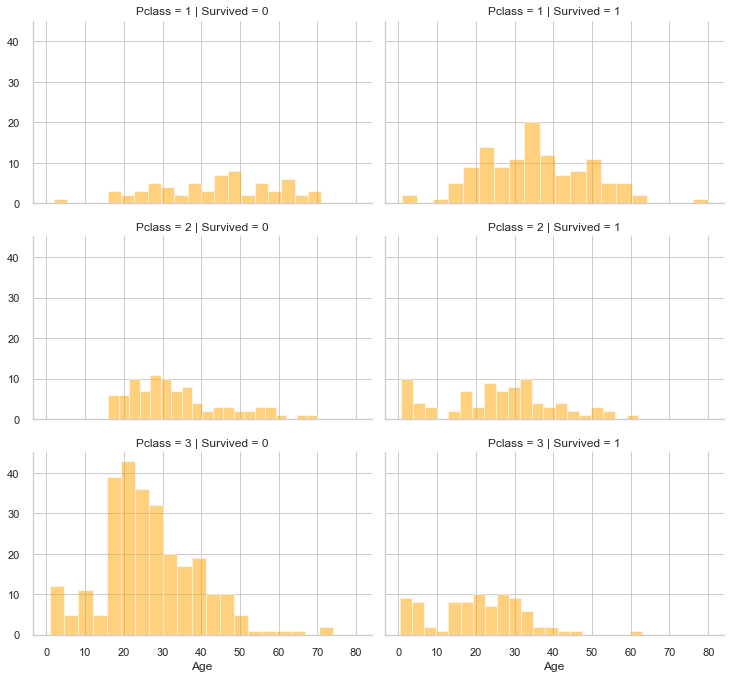

In [18]:
### Graphe survie selon la classe et l'age
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20, color="orange")
grid.add_legend();

In [19]:
### Le graphique ci-dessus confirme notre hypothèse sur pclass 1, 
### mais nous pouvons également repérer une forte probabilité qu'une personne dans pclass 3 ne survive pas.

In [20]:
### Création des colonnes totalOfPersons et alone :
### On calcule le nombre de personnes qui accompagnent les passagers
### Pour vérifier s'ils voyagent seuls ou accompagnés

data = [train_data, test_data]
for dataset in data:
    dataset['totralOfPersons'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['totralOfPersons'] > 0, 'alone'] = 'No'
    dataset.loc[dataset['totralOfPersons'] == 0, 'alone'] = 'Yes'
train_data['alone'].value_counts()

Yes    537
No     354
Name: alone, dtype: int64

In [21]:
### Afficher le nombre de passagers qui voyagent seuls ou accompagnés sur le test_data
test_data['alone'].value_counts()

Yes    537
No     354
Name: alone, dtype: int64

In [22]:
### Afficher le nombre de passagers avec le nombre d'accompagnants
train_data['totralOfPersons'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: totralOfPersons, dtype: int64

In [23]:
### Troisième question qu'on s'est posé :
### Les passagers ont-ils de meilleures chances de survie lorsqu'ils voyagent seuls ?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


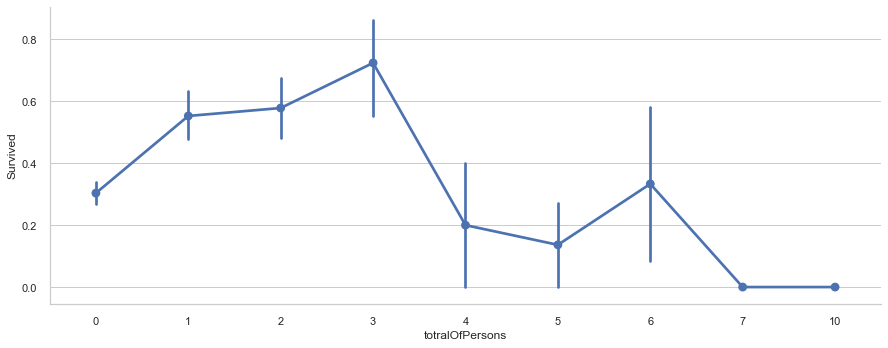

In [24]:
### Graphe survie selon le nombre de personnes d'accompagnants
axes = sns.factorplot('totralOfPersons','Survived', 
                      data=train_data, aspect = 2.5, );

In [25]:
### Traitement des données

In [26]:
### Supprimer la colonne passengerId
train_data = train_data.drop(['PassengerId'], axis=1)

In [27]:
### Afficher les détails statistique de la colonne cabine
train_data['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [28]:
### Traitement de la colonne cabin
### Regrouper les valeurs par caractère 
### remplacer les valeurs manquantes par U
### Créer une novelle colonnes Cab à partir de la colonne cabin
import re
Cab = {"A": "A", "B": "B", "C": "C", "D": "D", "E": "E", "F": "F", "G": "G", "U": "U"}
data = [train_data, test_data]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Cab'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Cab'] = dataset['Cab'].map(Cab)
    dataset['Cab'] = dataset['Cab'].fillna("U")
    
### Supprimer la colonne Cabin
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

In [29]:
### Afficher le nombre de passagers par Cab
train_data['Cab'].value_counts()

U    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Cab, dtype: int64

In [30]:
### Regroupement par moyenne et par Cab
train_data.groupby('Cab').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,totralOfPersons
Cab,,,,,,,
A,0.466667,1.000000,44.833333,0.133333,0.133333,39.623887,0.266667
B,0.744681,1.000000,34.955556,0.361702,0.574468,113.505764,0.936170
C,0.593220,1.000000,36.086667,0.644068,0.474576,100.151341,1.118644
D,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576,0.727273
E,0.750000,1.312500,38.116667,0.312500,0.312500,46.026694,0.625000
F,0.615385,2.384615,19.954545,0.538462,0.538462,18.696792,1.076923
G,0.500000,3.000000,14.750000,0.500000,1.250000,13.581250,1.750000
U,0.299419,2.636628,27.588208,0.546512,0.364826,19.181079,0.911337


In [31]:
### Afficher le nombre de passagers par Cab dans le fichier test_data
test_data['Cab'].value_counts()

U    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Cab, dtype: int64

In [32]:
### Traitement de la colonne age
### Calculer la moyenne et la variance de la colonne age
### Remplacer les valeurs vides par des nombres aléatoires calculés à partir de la moyenne et la variance

data = [train_data, test_data]

for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

In [33]:
### Vérification
train_data["Age"].isnull().sum()

0

In [34]:
### Afficher les détails statistique de la colonne Age

train_data["Age"].describe()

count    891.000000
mean      29.435466
std       13.534020
min        0.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
### Afficher les détails statistique de la colonne Embarked

train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [36]:
### Afficher le port d'embarquement avec la majorité de données

train_data['Embarked'].mode()

0    S
dtype: object

In [37]:
### Remplacer les valeurs vides par le port S
### Nous supposons que les passagers qui n'ont pas de port mentionné se sont embarqués au port S
common_value = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [38]:
### Afficher les détails statistique de la colonne Embarked
test_data['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [39]:
### Convertir la colonnes Fare en int
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [40]:
### Afficher les détails statistique de la colonne Fare
train_data['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [41]:
### Vérifier si on a des valeurs vides dans la colonne Fare
train_data['Fare'].isnull().sum()

0

In [42]:
### Afficher les détails statistique de la colonne Fare
test_data['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

In [43]:
### Vérifier si on a des valeurs vides dans la colonne Fare fichier test
test_data['Fare'].isnull().sum()

0

In [44]:
### Convertir en int fichier train
train_data['Fare'] = train_data['Fare'].astype(int)

In [45]:
### Convertir en int sur le fichier test
test_data['Fare'] = test_data['Fare'].astype(int)

In [46]:
### Traitement de la colonne Name

In [47]:
### Extraire les titres des passagers
train_titles = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
type(train_titles)

pandas.core.series.Series

In [48]:
### Afficher le nombre de passagers par titre
train_titles.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Jonkheer      1
Countess      1
Sir           1
Ms            1
Mme           1
Lady          1
Capt          1
Name: Name, dtype: int64

In [49]:
### Remplacer les titres par des entiers pour faciliter le traitement
### Remplacer les titres non fréquent par rare
### Remplacer: Mlle par Miss, Ms par Miss, Mme par Mrs
### Ceci pour une meilleure catégorisation des données

data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

In [50]:
### Repartition de la moyenne par titre
train_data.groupby(['Title']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,totralOfPersons
Title,,,,,,,
Master,0.575000,2.625000,6.825000,2.300000,1.375000,34.250000,3.675000
Miss,0.702703,2.291892,22.967568,0.702703,0.540541,43.340541,1.243243
Mr,0.156673,2.410058,31.622824,0.288201,0.152805,24.021277,0.441006
Mrs,0.793651,1.992063,34.388889,0.690476,0.825397,44.984127,1.515873
Rare,0.347826,1.347826,44.478261,0.347826,0.086957,36.782609,0.434783


In [51]:
#### Traitement de la colonne sexe

In [52]:
### Repartition des données par sexe
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [53]:
### Vérification
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [54]:
###Traitement de la colonne Ticket
train_data['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [55]:
### Cette colonne contient 681 valeurs uniques, il n'est donc pas pertinent de travailler dessus.Nous allons donc supprimer cette colonne.
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

In [56]:

### Traitement sur la colonne Age
### Dans une nouvelle colonne, nous allons calculer un indicateur en multipliant la classe et l'age du passager
data = [train_data, test_data] 
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [57]:
### Après analyse sur l'age, nous decidons de classer les passagers en 8 catégories d'age
data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7
    
    dataset['Age'] = dataset['Age'].astype(str)
    dataset.loc[ dataset['Age'] == '0', 'Age'] = "Children"
    dataset.loc[ dataset['Age'] == '1', 'Age'] = "Teens"
    dataset.loc[ dataset['Age'] == '2', 'Age'] = "Youngsters"
    dataset.loc[ dataset['Age'] == '3', 'Age'] = "Young Adults"
    dataset.loc[ dataset['Age'] == '4', 'Age'] = "Adults"
    dataset.loc[ dataset['Age'] == '5', 'Age'] = "Middle Age"
    dataset.loc[ dataset['Age'] == '6', 'Age'] = "Senior"
    dataset.loc[ dataset['Age'] == '7', 'Age'] = "Retired"


In [58]:
### Après analyse des prix, nous supposons que le prix affiché correspond au montant total payé par le voyageur, qu'il soit acccompagné ou seul
### Il est donc necessaire de calculer le prix par passager en divisant le prix par le nombre de personne 
for dataset in data:
    dataset['Person_Fare'] = dataset['Fare']/(dataset['totralOfPersons']+1)
    dataset['Person_Fare'] = dataset['Person_Fare'].astype(int)

In [59]:
### Afficher les informations sur notre fichier train
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    int32 
 7   Embarked         891 non-null    object
 8   totralOfPersons  891 non-null    int64 
 9   alone            891 non-null    object
 10  Cab              891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Person_Fare      891 non-null    int32 
dtypes: int32(2), int64(6), object(6)
memory usage: 90.6+ KB


In [60]:
### Traitement de la colonne Fare (Prix)
### Après une analyse approfondie(Dispersion et repartition) nous decidons de repartir les prix en 6 catégories 
data = [train_data, test_data]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset['Fare'] = dataset['Fare'].astype(str)
    dataset.loc[ dataset['Fare'] == '0', 'Fare'] = "Extra Low"
    dataset.loc[ dataset['Fare'] == '1', 'Fare'] = "Very Low"
    dataset.loc[ dataset['Fare'] == '2', 'Fare'] = "Low"
    dataset.loc[ dataset['Fare'] == '3', 'Fare'] = "High"
    dataset.loc[ dataset['Fare'] == '4', 'Fare'] = "Very High"
    dataset.loc[ dataset['Fare'] == '5', 'Fare'] = "Extra High"

In [61]:
# Vérifications
train_data['Fare'].value_counts()


Extra Low     241
Low           223
Very Low      216
High          158
Very High      44
Extra High      9
Name: Fare, dtype: int64

In [62]:
test_data['Fare'].value_counts()

Extra Low     241
Low           223
Very Low      216
High          158
Very High      44
Extra High      9
Name: Fare, dtype: int64

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    object
 7   Embarked         891 non-null    object
 8   totralOfPersons  891 non-null    int64 
 9   alone            891 non-null    object
 10  Cab              891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Person_Fare      891 non-null    int32 
dtypes: int32(1), int64(6), object(7)
memory usage: 94.1+ KB


In [64]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PassengerId      891 non-null    int64 
 1   Pclass           891 non-null    int64 
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    object
 7   Embarked         891 non-null    object
 8   totralOfPersons  891 non-null    int64 
 9   alone            891 non-null    object
 10  Cab              891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Person_Fare      891 non-null    int32 
dtypes: int32(1), int64(6), object(7)
memory usage: 94.1+ KB


In [65]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,totralOfPersons,alone,Cab,Title,Age_Class,Person_Fare
0,0,3,male,Youngsters,1,0,Extra Low,S,1,No,U,Mr,66,3
1,1,1,female,Middle Age,1,0,High,C,1,No,C,Mrs,38,35
2,1,3,female,Young Adults,0,0,Extra Low,S,0,Yes,U,Miss,78,7
3,1,1,female,Middle Age,1,0,High,S,1,No,C,Mrs,35,26
4,0,3,male,Middle Age,0,0,Very Low,S,0,Yes,U,Mr,105,8
5,0,3,male,Youngsters,0,0,Very Low,Q,0,Yes,U,Mr,57,8
6,0,1,male,Senior,0,0,High,S,0,Yes,E,Mr,54,51
7,0,3,male,Children,3,1,Low,S,4,No,U,Master,6,4
8,1,3,female,Young Adults,0,2,Very Low,S,2,No,U,Mrs,81,3
9,1,2,female,Teens,1,0,Low,C,1,No,U,Mrs,28,15


In [66]:
### Taitement de la colonne Pclass
### Affichage de la repartition des données par Pclass
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [67]:
### Pour la suite nous allons modifier la colonne Pclass, en remplaçant les entiers par une chaine de caractère
data = [train_data, test_data]

for dataset in data:
    dataset['Pclass'] = dataset['Pclass'].astype(str)
    dataset.loc[ dataset['Pclass'] == '1', 'Pclass'] = "Class1"
    dataset.loc[ dataset['Pclass'] == '2', 'Pclass'] = "Class2"
    dataset.loc[ dataset['Pclass'] == '3', 'Pclass'] = "Class3"

In [68]:
### vérification
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Survived         891 non-null    int64 
 1   Pclass           891 non-null    object
 2   Sex              891 non-null    object
 3   Age              891 non-null    object
 4   SibSp            891 non-null    int64 
 5   Parch            891 non-null    int64 
 6   Fare             891 non-null    object
 7   Embarked         891 non-null    object
 8   totralOfPersons  891 non-null    int64 
 9   alone            891 non-null    object
 10  Cab              891 non-null    object
 11  Title            891 non-null    object
 12  Age_Class        891 non-null    int64 
 13  Person_Fare      891 non-null    int32 
dtypes: int32(1), int64(5), object(8)
memory usage: 94.1+ KB


In [69]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,totralOfPersons,alone,Cab,Title,Age_Class,Person_Fare
0,0,Class3,male,Youngsters,1,0,Extra Low,S,1,No,U,Mr,66,3
1,1,Class1,female,Middle Age,1,0,High,C,1,No,C,Mrs,38,35
2,1,Class3,female,Young Adults,0,0,Extra Low,S,0,Yes,U,Miss,78,7
3,1,Class1,female,Middle Age,1,0,High,S,1,No,C,Mrs,35,26
4,0,Class3,male,Middle Age,0,0,Very Low,S,0,Yes,U,Mr,105,8
5,0,Class3,male,Youngsters,0,0,Very Low,Q,0,Yes,U,Mr,57,8
6,0,Class1,male,Senior,0,0,High,S,0,Yes,E,Mr,54,51
7,0,Class3,male,Children,3,1,Low,S,4,No,U,Master,6,4
8,1,Class3,female,Young Adults,0,2,Very Low,S,2,No,U,Mrs,81,3
9,1,Class2,female,Teens,1,0,Low,C,1,No,U,Mrs,28,15


In [70]:
train_data['Pclass'].value_counts()

Class3    491
Class1    216
Class2    184
Name: Pclass, dtype: int64

In [71]:
### La mise à l’echelle
### Sélection des données numériques, puis mise à l'échelle par la technique StandardScaler() (rapport moyenne et ecart type)
### Ce traitement sera effectué sur les deux fichiers (train et test)

In [72]:
### Train
train_numerical_features = list(train_data.select_dtypes(include=['int64', 'float64', 'int32']).columns)
train_numerical_features

['Survived', 'SibSp', 'Parch', 'totralOfPersons', 'Age_Class', 'Person_Fare']

In [73]:
type(train_numerical_features)

list

In [74]:
del train_numerical_features[0]
train_numerical_features

['SibSp', 'Parch', 'totralOfPersons', 'Age_Class', 'Person_Fare']

In [75]:
### Pour une mise à l'échelle moins risquée nous avons choisi la technique StandardScaler()
ss_scaler = StandardScaler()
train_data_ss = pd.DataFrame(data = train_data)
train_data_ss[train_numerical_features] = ss_scaler.fit_transform(train_data_ss[train_numerical_features])

In [76]:
### Vérifications
train_data_ss.shape

(891, 14)

In [77]:
train_data_ss.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,totralOfPersons,alone,Cab,Title,Age_Class,Person_Fare
0,0,Class3,male,Youngsters,0.432793,-0.473674,Extra Low,S,0.059160,No,U,Mr,0.052625,-0.459218
1,1,Class1,female,Middle Age,0.432793,-0.473674,High,C,0.059160,No,C,Mrs,-0.771539,0.434090
2,1,Class3,female,Young Adults,-0.474545,-0.473674,Extra Low,S,-0.560975,Yes,U,Miss,0.405839,-0.347554
3,1,Class1,female,Middle Age,0.432793,-0.473674,High,S,0.059160,No,C,Mrs,-0.859843,0.182847
4,0,Class3,male,Middle Age,-0.474545,-0.473674,Very Low,S,-0.560975,Yes,U,Mr,1.200569,-0.319638


In [78]:
### Test
test_numerical_features = list(test_data.select_dtypes(include=['int64', 'float64', 'int32']).columns)
test_numerical_features

['PassengerId',
 'SibSp',
 'Parch',
 'totralOfPersons',
 'Age_Class',
 'Person_Fare']

In [79]:
del test_numerical_features[0]
test_numerical_features

['SibSp', 'Parch', 'totralOfPersons', 'Age_Class', 'Person_Fare']

In [80]:
test_ss_scaler = StandardScaler()
test_data_ss = pd.DataFrame(data = test_data)
test_data_ss[test_numerical_features] = test_ss_scaler.fit_transform(test_data_ss[test_numerical_features])

In [81]:
### Vérifications
test_data.shape

(891, 14)

In [82]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,totralOfPersons,alone,Cab,Title,Age_Class,Person_Fare
0,1,Class3,male,Youngsters,0.432793,-0.473674,Extra Low,S,0.059160,No,U,Mr,0.052625,-0.459218
1,2,Class1,female,Middle Age,0.432793,-0.473674,High,C,0.059160,No,C,Mrs,-0.771539,0.434090
2,3,Class3,female,Young Adults,-0.474545,-0.473674,Extra Low,S,-0.560975,Yes,U,Miss,0.405839,-0.347554
3,4,Class1,female,Middle Age,0.432793,-0.473674,High,S,0.059160,No,C,Mrs,-0.859843,0.182847
4,5,Class3,male,Middle Age,-0.474545,-0.473674,Very Low,S,-0.560975,Yes,U,Mr,1.200569,-0.319638


In [83]:
### Encodage Binaire (création des variables catégorielles)
### Pour ce faire nous allons utiliser la fonction dummies()
### Train
encode_col_list = list(train_data.select_dtypes(include=['object']).columns)
for i in encode_col_list:
    train_data_ss = pd.concat([train_data_ss,pd.get_dummies(train_data_ss[i], prefix=i)],axis=1)
    train_data_ss.drop(i, axis = 1, inplace=True)

In [84]:
train_data_ss.shape

(891, 43)

In [85]:
train_data_ss.head()

,Survived,SibSp,Parch,totralOfPersons,Age_Class,Person_Fare,Pclass_Class1,Pclass_Class2,Pclass_Class3,Sex_female,...,Cab_D,Cab_E,Cab_F,Cab_G,Cab_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0.432793,-0.473674,0.059160,0.052625,-0.459218,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0.432793,-0.473674,0.059160,-0.771539,0.434090,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,-0.474545,-0.473674,-0.560975,0.405839,-0.347554,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,1,0.432793,-0.473674,0.059160,-0.859843,0.182847,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,-0.474545,-0.473674,-0.560975,1.200569,-0.319638,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [86]:
### Test
test_encode_col_list = list(test_data.select_dtypes(include=['object']).columns)
for i in test_encode_col_list:
    test_data_ss = pd.concat([test_data_ss,pd.get_dummies(test_data_ss[i], prefix=i)],axis=1)
    test_data_ss.drop(i, axis = 1, inplace=True)

In [87]:
test_data_ss.shape

(891, 43)

In [88]:
test_data_ss.head()

,PassengerId,SibSp,Parch,totralOfPersons,Age_Class,Person_Fare,Pclass_Class1,Pclass_Class2,Pclass_Class3,Sex_female,...,Cab_D,Cab_E,Cab_F,Cab_G,Cab_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0.432793,-0.473674,0.059160,0.052625,-0.459218,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,2,0.432793,-0.473674,0.059160,-0.771539,0.434090,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,-0.474545,-0.473674,-0.560975,0.405839,-0.347554,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,4,0.432793,-0.473674,0.059160,-0.859843,0.182847,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5,-0.474545,-0.473674,-0.560975,1.200569,-0.319638,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [89]:
### Entrainement du modele 

In [90]:
X_train = train_data_ss.drop("Survived", axis=1)
Y_train = train_data_ss["Survived"]
X_test  = test_data_ss.drop("PassengerId", axis=1).copy()

In [91]:
X_train.shape

(891, 42)

In [92]:
Y_train.shape

(891,)

In [93]:
X_test.shape

(891, 42)

In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SibSp             891 non-null    float64
 1   Parch             891 non-null    float64
 2   totralOfPersons   891 non-null    float64
 3   Age_Class         891 non-null    float64
 4   Person_Fare       891 non-null    float64
 5   Pclass_Class1     891 non-null    uint8  
 6   Pclass_Class2     891 non-null    uint8  
 7   Pclass_Class3     891 non-null    uint8  
 8   Sex_female        891 non-null    uint8  
 9   Sex_male          891 non-null    uint8  
 10  Age_Adults        891 non-null    uint8  
 11  Age_Children      891 non-null    uint8  
 12  Age_Middle Age    891 non-null    uint8  
 13  Age_Retired       891 non-null    uint8  
 14  Age_Senior        891 non-null    uint8  
 15  Age_Teens         891 non-null    uint8  
 16  Age_Young Adults  891 non-null    uint8  
 1

In [95]:
### Utilisation de RandomForest() comme modèle de decision 
### D'après nos recherches et les tests effectués ce modèle est le plus précis 
### Nous avons fait un test avec les modèles (KNeighborsClassifier(),LogisticRegression) avec des resultats moins précis. 

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

random_forest_predictions = random_forest.predict(X_test)

rf_data = pd.read_csv('test2.csv')
rf_data.insert((rf_data.shape[1]),'Survived',random_forest_predictions)

rf_data.to_csv('My_submission.csv')